In [ ]:
import pandas as pd

In [ ]:
# Load the normalized DataFrame from a CSV file
df_normalized = pd.read_csv('/content/drive/MyDrive/ravi/df_normalized.csv')  # Replace 'path_to_your_file.csv' with your actual file path


In [ ]:
df_normalized.head()

,runtime_minutes,movie_averagerating,movie_numerofvotes,approval_index,production budget $,domestic gross $,worldwide gross $,profit $,ROI,composite_score,blockbuster
0,-0.319881,0.782505,1.135807,1.144274,-0.183056,0.686305,0.579812,0.136852,0.208099,0.206267,-0.496608
1,0.100756,-0.594386,-1.886908,-1.351697,-0.343144,-3.590112,-3.844042,-0.561833,-0.326703,-0.617200,-0.496608
2,-0.646193,0.880854,1.165469,1.232756,-0.285720,0.366677,0.290083,-0.164540,0.018419,-0.129504,-0.496608
3,-0.481813,-1.577880,-0.234791,-1.099131,1.061386,0.649091,0.341023,-0.602911,-0.268066,-0.626833,-0.496608
4,-0.107596,-0.102640,-1.340304,-0.835569,-0.634034,-2.926408,-2.709018,-0.533952,-0.325453,-0.592762,-0.496608


In [ ]:

from sklearn.model_selection import train_test_split


# Select features and target
X = df_normalized.drop(columns=['profit $', 'ROI'])  # Features (drop the target column)
y = df_normalized['ROI']  # Target variable

# Splitting the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Output the shape of the resulting splits
print("Training features shape:", X_train.shape)
print("Test features shape:", X_test.shape)
print("Training target shape:", y_train.shape)
print("Test target shape:", y_test.shape)

Training features shape: (3392, 9)
Test features shape: (849, 9)
Training target shape: (3392,)
Test target shape: (849,)


In [ ]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the SVR model (you can adjust kernel, C, gamma parameters as needed)
svr_model = make_pipeline(StandardScaler(), SVR(kernel='rbf', C=1.0, gamma='scale'))

# Fit the model on the training data
svr_model.fit(X_train, y_train)

# Predict the target variable on the test data
y_pred = svr_model.predict(X_test)

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Output the results
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)


Mean Squared Error (MSE): 0.054981813761227974
R-squared (R2) Score: 0.8753288932166182


In [ ]:
print("Predicted ROI:", y_pred)


Predicted ROI: [-6.69878581e-02 -1.62848139e-01  6.99996540e-02  1.85225530e+00
 -2.14062477e-01 -2.46678645e-02 -3.12943107e-01 -3.02543026e-01
 -2.48753471e-01 -3.02025052e-01 -1.35781616e-01 -3.70384234e-01
  2.54164395e+00 -3.90358728e-01 -1.91940960e-01 -1.09458068e-01
 -3.45518535e-01  5.19210054e-01  3.67821307e-01 -3.37132365e-01
 -2.04440399e-01 -2.62921292e-01  1.06430543e-01 -2.41874467e-01
 -1.09693310e-01 -1.94155812e-01  1.56058065e-01 -3.32204772e-01
 -3.81187381e-02 -2.78112989e-01 -1.56331766e-01 -3.95959591e-02
 -1.45706175e-01 -6.15212070e-02 -2.13691501e-01 -2.34760664e-01
  7.65334574e-02 -3.12256840e-01 -3.29436581e-01  1.22465963e+00
 -3.28190358e-01 -5.38575776e-02 -3.34885378e-01 -2.27305108e-01
 -3.21869666e-01 -3.07745402e-01 -2.77452852e-01  2.08986906e-01
 -2.47385325e-01 -1.81799350e-01 -3.77663364e-01 -6.98998973e-03
  2.71051535e-01  2.05975094e-02  4.31256385e-01 -2.54150541e-02
 -3.00364408e-01 -3.31386238e-01 -2.97032552e-01  2.01038875e-01
 -3.077774

In [ ]:
print("Actual ROI:", y_test.values)

Actual ROI: [-2.94491491e-01 -1.41494636e-01 -1.41263812e-01  1.76138624e+00
 -2.66134691e-01  2.41620311e-02 -2.67219066e-01 -2.51530459e-01
 -1.97195346e-01 -3.25249754e-01 -1.12038134e-01 -2.81151558e-01
  2.51990620e+00 -3.21860523e-01 -1.81832079e-01 -1.62718829e-01
 -3.13615534e-01  5.99841177e-01  3.51651802e-01 -2.57722128e-01
 -1.87542504e-01 -2.73006094e-01  2.38107943e-02 -2.52181795e-01
 -5.74551455e-02 -1.83431693e-01  7.78475271e-02 -2.64780507e-01
 -3.97961439e-02 -2.55213010e-01 -1.27137048e-01  3.42218043e-03
 -8.58638429e-02 -1.36255415e-01 -2.01681790e-01 -2.11734876e-01
 -1.06152844e-01 -2.43408642e-01 -2.67142921e-01  1.15672902e+00
 -2.66316925e-01 -1.92796612e-02 -2.79470071e-01 -1.62138382e-01
 -2.36925363e-01 -2.38726681e-01 -2.34570061e-01  1.81091050e-01
 -2.46635370e-01 -1.55531108e-01 -2.88711755e-01 -4.34619353e-02
  3.13901411e-01  3.57324269e-02  3.38880610e-01  2.16566004e-02
 -2.46325755e-01 -2.60547602e-01 -2.45715175e-01  1.72380284e-01
 -2.64315800e

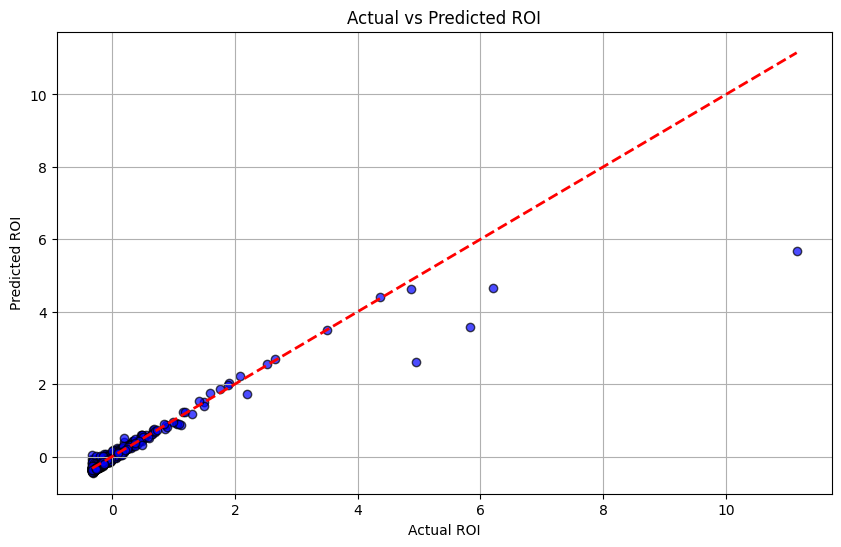

In [ ]:
import matplotlib.pyplot as plt

# Assuming y_pred contains the predicted ROI values and y_test contains the actual ROI values

# Plotting the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
plt.xlabel('Actual ROI')
plt.ylabel('Predicted ROI')
plt.title('Actual vs Predicted ROI')
plt.grid(True)
plt.show()


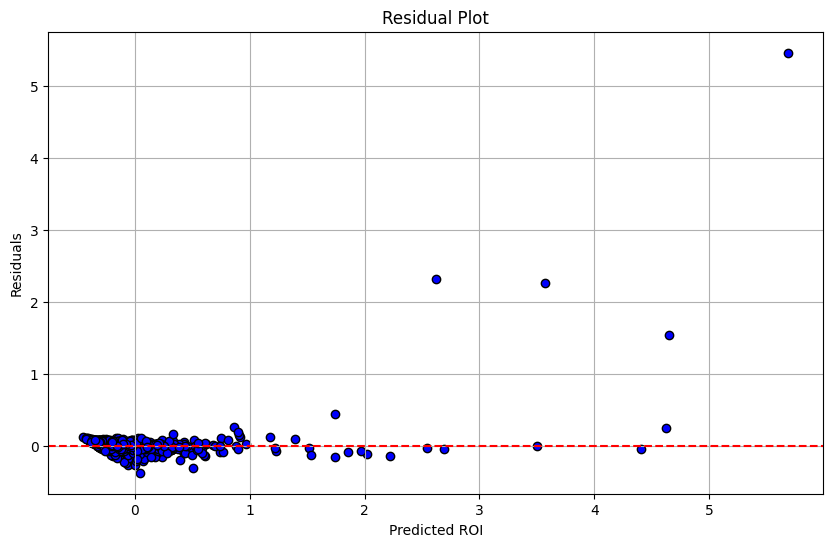

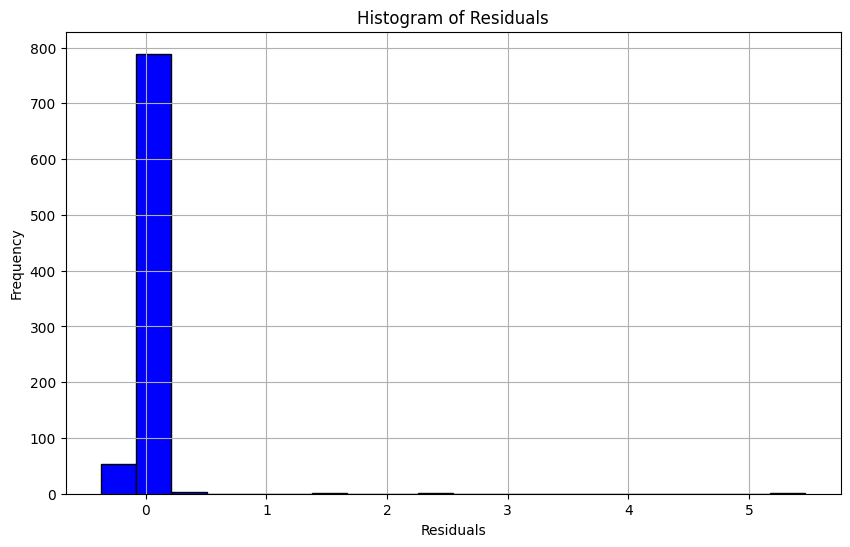

In [ ]:
residuals = y_test - y_pred

# Residual plot
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='blue', edgecolor='k')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted ROI')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True)
plt.show()

# Histogram of residuals
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=20, color='blue', edgecolor='k')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.grid(True)
plt.show()


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2) Score:", r2)


Mean Absolute Error (MAE): 0.06540600248040562
Mean Squared Error (MSE): 0.054981813761227974
Root Mean Squared Error (RMSE): 0.2344820115941263
R-squared (R2) Score: 0.8753288932166182


In [ ]:
# Create a DataFrame with the actual predictions and the corresponding features from X_test
predictions_df = pd.DataFrame({'Predicted ROI': y_pred})

# Concatenate the predictions with the test set features
df_combined = pd.concat([predictions_df.reset_index(drop=True), X_test.reset_index(drop=True)], axis=1)

# Calculate the correlation between Predicted ROI and each feature
correlations = df_combined.corr()['Predicted ROI'].drop('Predicted ROI')  # Dropping the self-correlation

print(correlations)


runtime_minutes        0.042079
movie_averagerating    0.180083
movie_numerofvotes     0.141884
approval_index         0.192778
production budget $   -0.300504
domestic gross $       0.219708
worldwide gross $      0.226017
composite_score        0.489490
blockbuster            0.437884
Name: Predicted ROI, dtype: float64


In [ ]:
# Original predictions using the SVR model
original_predictions = svr_model.predict(X_test)

# Hypothetical scenario: Increase production budget by 20%
X_test_modified = X_test.copy()
X_test_modified['production budget $'] *= 1.2

# Predict ROI under the hypothetical scenario using the SVR model
hypothetical_predictions = svr_model.predict(X_test_modified)

# Compare the original and hypothetical predictions
comparison_df = pd.DataFrame({
    'Original Predicted ROI': original_predictions,
    'Hypothetical Predicted ROI': hypothetical_predictions
})

print(comparison_df)


     Original Predicted ROI  Hypothetical Predicted ROI
0                 -0.066988                    0.172968
1                 -0.162848                   -0.152136
2                  0.070000                    0.187436
3                  1.852255                    2.054797
4                 -0.214062                   -0.188467
..                      ...                         ...
844               -0.154412                   -0.071684
845               -0.198786                   -0.224783
846                0.191066                    0.158040
847               -0.312861                   -0.315660
848               -0.346942                   -0.343886

[849 rows x 2 columns]


In [ ]:
sensitivity_results = {}

# Assuming the model used was `svr_model`
for feature in X_test.columns:
    X_test_modified = X_test.copy()
    # Increase the feature by 10%
    X_test_modified[feature] *= 1.1
    # Predict ROI using the SVR model
    new_predictions = svr_model.predict(X_test_modified)
    # Calculate the mean change in predictions
    sensitivity_results[feature] = (new_predictions - original_predictions).mean()

sensitivity_df = pd.DataFrame.from_dict(sensitivity_results, orient='index', columns=['Mean Change in Predicted ROI'])
print(sensitivity_df)


                     Mean Change in Predicted ROI
runtime_minutes                          0.002223
movie_averagerating                      0.001985
movie_numerofvotes                       0.002825
approval_index                           0.001271
production budget $                      0.006710
domestic gross $                         0.001317
worldwide gross $                       -0.000775
composite_score                          0.001766
blockbuster                              0.009468


In [ ]:
# Define scenarios
scenarios = {
    'Optimistic': {'movie_averagerating': 8.5, 'production budget $': X_test['production budget $'] * 0.9},
    'Pessimistic': {'movie_averagerating': 6.5, 'production budget $': X_test['production budget $'] * 1.2},
    'Most Likely': {'movie_averagerating': X_test['movie_averagerating'].mean(), 'production budget $': X_test['production budget $'].mean()}
}

scenario_results = {}

# Assuming you are using the `svr_model` defined earlier
for scenario, changes in scenarios.items():
    X_test_modified = X_test.copy()
    for feature, value in changes.items():
        X_test_modified[feature] = value
    scenario_results[scenario] = svr_model.predict(X_test_modified).mean()  # Use svr_model instead of model

scenario_df = pd.DataFrame.from_dict(scenario_results, orient='index', columns=['Average Predicted ROI'])
print(scenario_df)


             Average Predicted ROI
Optimistic                0.907456
Pessimistic               0.858601
Most Likely               0.011103


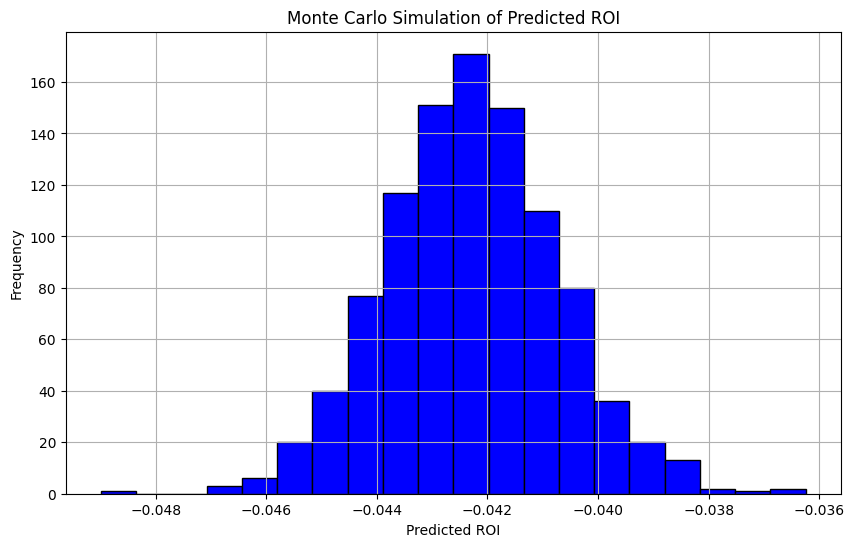

In [ ]:
import numpy as np

num_simulations = 1000
simulations = []

for _ in range(num_simulations):
    X_test_simulation = X_test.copy()
    X_test_simulation['production budget $'] *= np.random.normal(1.0, 0.1, X_test.shape[0])
    X_test_simulation['movie_averagerating'] += np.random.normal(0, 0.5, X_test.shape[0])
    simulation_pred = svr_model.predict(X_test_simulation)
    simulations.append(simulation_pred.mean())

# Plot the distribution of simulation outcomes
plt.figure(figsize=(10, 6))
plt.hist(simulations, bins=20, color='blue', edgecolor='k')
plt.xlabel('Predicted ROI')
plt.ylabel('Frequency')
plt.title('Monte Carlo Simulation of Predicted ROI')
plt.grid(True)
plt.show()


Confusion Matrix:
[[  0   4]
 [  0 845]]


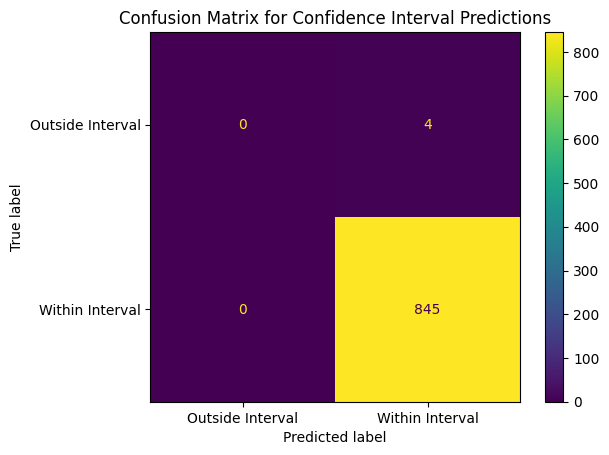

In [ ]:
import numpy as np
import scipy.stats as stats
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Calculate residuals
residuals = y_test - y_pred

# Estimate the standard error of the residuals
std_error = np.std(residuals)

# Define confidence level (e.g., 95%)
confidence_level = 0.95
z_score = stats.norm.ppf((1 + confidence_level) / 2)  # Z-score for 95% confidence

# Calculate confidence intervals for each prediction
lower_bound = y_pred - z_score * std_error
upper_bound = y_pred + z_score * std_error

# Check if the actual ROI falls within the confidence interval (True/False)
within_confidence_interval = (y_test >= lower_bound) & (y_test <= upper_bound)

# Convert True/False results to binary (True=1, False=0)
y_true = within_confidence_interval.astype(int)  # Actual values (within interval or not)
y_pred_binary = np.ones_like(y_true)  # Predicted values (assuming model predicts within interval)

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred_binary)

# Display the confusion matrix
print("Confusion Matrix:")
print(cm)

# Optionally, visualize the confusion matrix
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Outside Interval", "Within Interval"])
cmd.plot()
plt.title("Confusion Matrix for Confidence Interval Predictions")
plt.show()


svr movie ratings

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np




# Assuming df_normalized is your normalized dataframe and 'profit $' is your target variable
# Select features and target
X = df_normalized.drop(columns=['movie_averagerating'])  # Features (drop the target column)
y = df_normalized['movie_averagerating']  # Target variable

# Splitting the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Output the shape of the resulting splits
print("Training features shape:", X_train.shape)
print("Test features shape:", X_test.shape)
print("Training target shape:", y_train.shape)
print("Test target shape:", y_test.shape)


Training features shape: (3392, 10)
Test features shape: (849, 10)
Training target shape: (3392,)
Test target shape: (849,)


In [ ]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the SVR model (you can adjust kernel, C, gamma parameters as needed)
svr_model = make_pipeline(StandardScaler(), SVR(kernel='rbf', C=1.0, gamma='scale'))

# Fit the model on the training data
svr_model.fit(X_train, y_train)

# Predict the target variable on the test data
y_pred = svr_model.predict(X_test)

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Output the results
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)


Mean Squared Error (MSE): 0.01812875250857731
R-squared (R2) Score: 0.9844812141513811


In [ ]:
print("Predicted movie_averagerating:", y_pred)


Predicted movie_averagerating: [-6.71460990e-01 -5.54852373e-01  1.78728948e+00 -3.66034414e-01
 -3.98768815e+00  1.55267832e+00  5.99860901e-01  1.19536812e+00
  6.87907809e-01  1.00709457e+00 -7.79661398e-01 -6.02465227e-01
  1.65946447e-01 -6.01156569e-01  1.15687599e+00 -2.07341179e-01
  1.31769996e-01  1.64942581e+00 -5.98641801e-01  3.87227065e-01
  9.36968232e-01 -2.51799681e+00  6.11838918e-01  1.29899283e-01
 -7.38603854e-01 -3.32923843e-01  1.91710303e-01  1.59008583e-01
  2.45668493e-02 -1.51420841e+00 -1.87441583e-01 -2.77344762e-01
 -1.03545033e+00 -1.62180437e+00  7.43125650e-01  8.68386446e-01
  1.94240750e-01 -1.65334176e+00 -8.86109897e-01  1.21260287e+00
 -1.37547295e-01 -1.15117101e+00 -2.35767507e-01 -1.71903388e-01
 -3.07776152e-01  2.57051084e-01 -3.55248372e-01  6.95906941e-01
  3.42622711e-01 -7.64722821e-01  4.90125989e-02  8.23171650e-01
  1.04936591e-01  4.05017179e-01 -1.91618440e-01  1.17298531e+00
  1.01230965e+00  9.58640228e-01 -8.82952354e-01  1.5081458

In [ ]:
print("Actual movie_averagerating:", y_test.values)

Actual movie_averagerating: [-9.87784046e-01 -5.94386498e-01  1.86434818e+00 -2.00988950e-01
 -4.13496443e+00  1.47095063e+00  4.87456759e-01  1.17590247e+00
  6.84155533e-01  1.07755308e+00 -7.91085272e-01 -5.94386498e-01
  1.92408598e-01 -5.94386498e-01  1.17590247e+00 -2.99338337e-01
  1.92408598e-01  1.76599879e+00 -6.92735885e-01  2.90757985e-01
  8.80854307e-01 -2.56137424e+00  6.84155533e-01  2.90757985e-01
 -6.92735885e-01 -3.97687724e-01  9.40592110e-02  9.40592110e-02
 -4.29017604e-03 -1.47953098e+00 -2.00988950e-01 -2.99338337e-01
 -9.87784046e-01 -1.77457914e+00  6.84155533e-01  7.82504920e-01
 -2.00988950e-01 -1.57788037e+00 -8.89434659e-01  1.27425186e+00
 -2.00988950e-01 -1.08613343e+00 -2.99338337e-01 -2.00988950e-01
 -2.99338337e-01  1.92408598e-01 -3.97687724e-01  5.85806146e-01
  2.90757985e-01 -7.91085272e-01 -4.29017604e-03  7.82504920e-01
  9.40592110e-02  3.89107372e-01 -2.99338337e-01  1.17590247e+00
  9.79203694e-01  8.80854307e-01 -8.89434659e-01  1.56930002e+

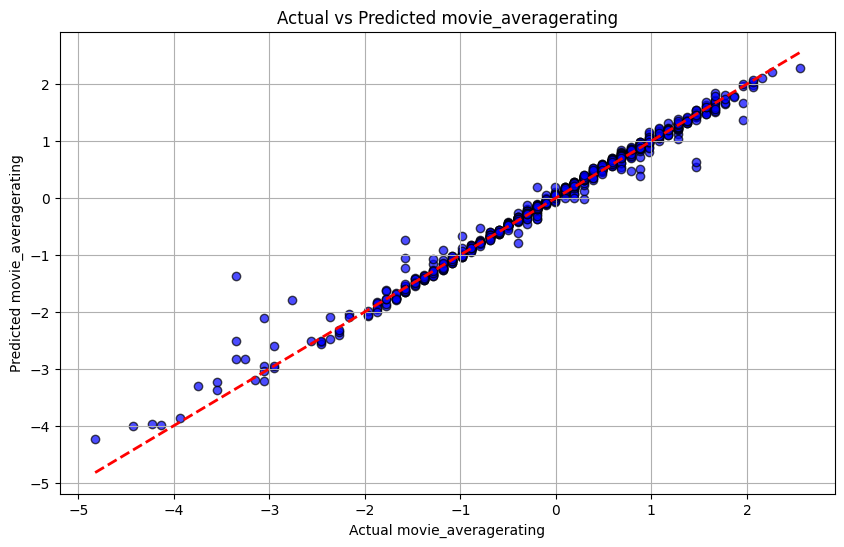

In [ ]:
import matplotlib.pyplot as plt

# Assuming y_pred contains the predicted movie_averagerating values and y_test contains the actual movie_averagerating values

# Plotting the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
plt.xlabel('Actual movie_averagerating')
plt.ylabel('Predicted movie_averagerating')
plt.title('Actual vs Predicted movie_averagerating')
plt.grid(True)
plt.show()


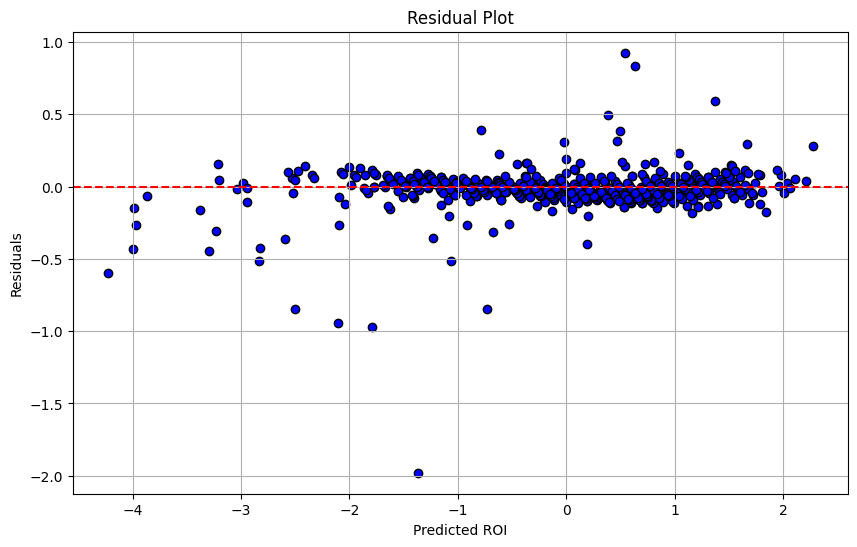

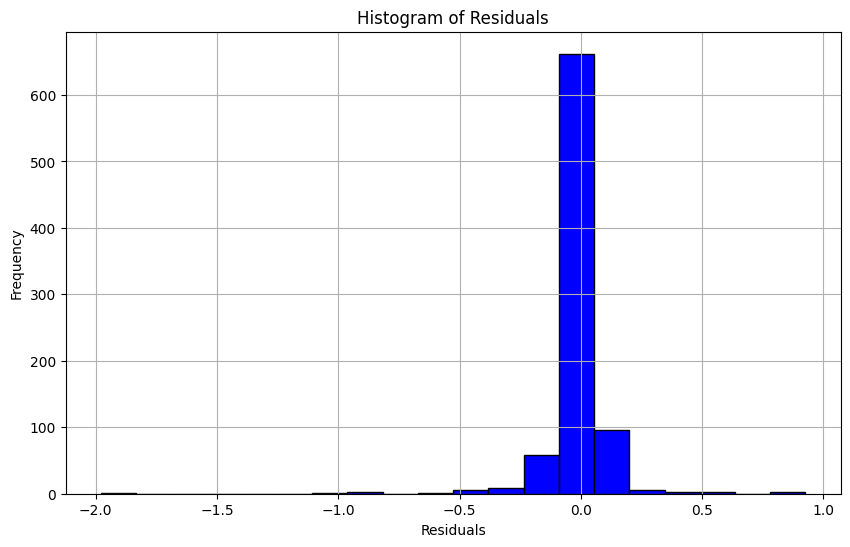

In [ ]:
residuals = y_test - y_pred

# Residual plot
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='blue', edgecolor='k')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted ROI')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True)
plt.show()

# Histogram of residuals
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=20, color='blue', edgecolor='k')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.grid(True)
plt.show()


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2) Score:", r2)


Mean Absolute Error (MAE): 0.0651671268422229
Mean Squared Error (MSE): 0.01812875250857731
Root Mean Squared Error (RMSE): 0.13464305592408882
R-squared (R2) Score: 0.9844812141513811


In [ ]:
# Create a DataFrame with the actual predictions and the corresponding features from X_test
predictions_df = pd.DataFrame({'Predicted movie_averagerating': y_pred})

# Concatenate the predictions with the test set features
df_combined = pd.concat([predictions_df.reset_index(drop=True), X_test.reset_index(drop=True)], axis=1)

# Calculate the correlation between Predicted movie_averagerating and each feature
correlations = df_combined.corr()['Predicted movie_averagerating'].drop('Predicted movie_averagerating')  # Dropping the self-correlation

print(correlations)


runtime_minutes        0.438474
movie_numerofvotes     0.482184
approval_index         0.880054
production budget $    0.002382
domestic gross $       0.196101
worldwide gross $      0.235775
profit $               0.254214
ROI                    0.156756
composite_score        0.274160
blockbuster            0.206206
Name: Predicted movie_averagerating, dtype: float64


In [ ]:
# Original predictions using the SVR model
original_predictions = svr_model.predict(X_test)

# Hypothetical scenario: Increase production budget by 20%
X_test_modified = X_test.copy()
X_test_modified['production budget $'] *= 1.2

# Predict ROI under the hypothetical scenario using the SVR model
hypothetical_predictions = svr_model.predict(X_test_modified)

# Compare the original and hypothetical predictions
comparison_df = pd.DataFrame({
    'Original Predicted ROI': original_predictions,
    'Hypothetical Predicted ROI': hypothetical_predictions
})

print(comparison_df)


     Original Predicted ROI  Hypothetical Predicted ROI
0                 -0.671461                   -0.457875
1                 -0.554852                   -0.553812
2                  1.787289                    1.733225
3                 -0.366034                   -0.360191
4                 -3.987688                   -3.961625
..                      ...                         ...
844                0.001689                    0.016327
845               -0.400072                   -0.398809
846                1.343638                    1.341395
847               -1.223163                   -1.211347
848                0.171199                    0.171537

[849 rows x 2 columns]


In [ ]:
sensitivity_results = {}

# Assuming the model used was `svr_model`
for feature in X_test.columns:
    X_test_modified = X_test.copy()
    # Increase the feature by 10%
    X_test_modified[feature] *= 1.1
    # Predict movie_averagerating using the SVR model
    new_predictions = svr_model.predict(X_test_modified)
    # Calculate the mean change in predictions
    sensitivity_results[feature] = (new_predictions - original_predictions).mean()

sensitivity_df = pd.DataFrame.from_dict(sensitivity_results, orient='index', columns=['Mean Change in Predicted movie_averagerating'])
print(sensitivity_df)


                     Mean Change in Predicted movie_averagerating
runtime_minutes                                          0.001875
movie_numerofvotes                                       0.008772
approval_index                                          -0.023056
production budget $                                      0.000192
domestic gross $                                        -0.001436
worldwide gross $                                        0.001823
profit $                                                -0.001759
ROI                                                      0.000520
composite_score                                         -0.000809
blockbuster                                              0.002877


In [ ]:
# Define scenarios
scenarios = {
    'Optimistic': {'approval_index': 8.5, 'production budget $': X_test['production budget $'] * 0.9},
    'Pessimistic': {'approval_index': 6.5, 'production budget $': X_test['production budget $'] * 1.2},
    'Most Likely': {'approval_index': X_test['approval_index'].mean(), 'production budget $': X_test['production budget $'].mean()}
}

scenario_results = {}

# Assuming you are using the `svr_model` defined earlier
for scenario, changes in scenarios.items():
    X_test_modified = X_test.copy()
    for feature, value in changes.items():
        X_test_modified[feature] = value
    scenario_results[scenario] = svr_model.predict(X_test_modified).mean()  # Use svr_model instead of model

scenario_df = pd.DataFrame.from_dict(scenario_results, orient='index', columns=['Average Predicted Rmovie_averagerating'])
print(scenario_df)


             Average Predicted Rmovie_averagerating
Optimistic                                 0.447968
Pessimistic                                0.843636
Most Likely                                0.132292


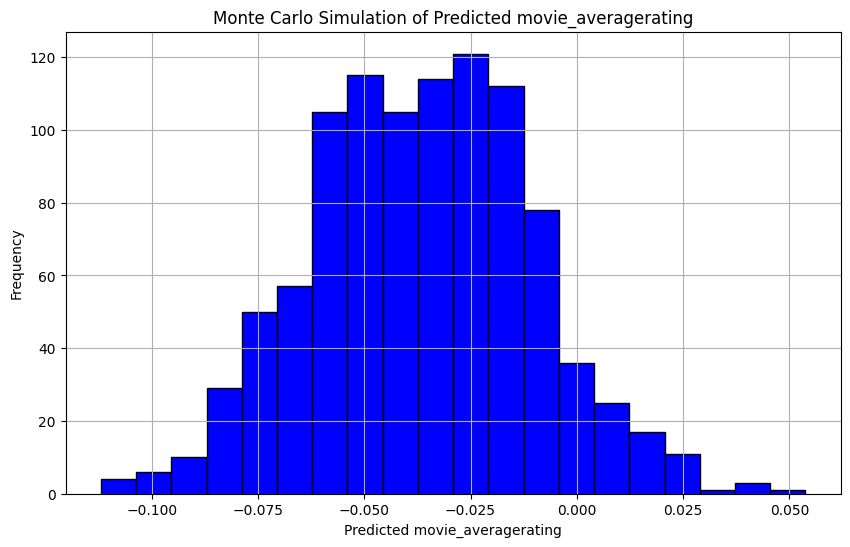

In [ ]:
import numpy as np

num_simulations = 1000
simulations = []

for _ in range(num_simulations):
    X_test_simulation = X_test.copy()
    X_test_simulation['production budget $'] *= np.random.normal(1.0, 0.1, X_test.shape[0])
    X_test_simulation['approval_index'] += np.random.normal(0, 0.5, X_test.shape[0])
    simulation_pred = svr_model.predict(X_test_simulation)
    simulations.append(simulation_pred.mean())

# Plot the distribution of simulation outcomes
plt.figure(figsize=(10, 6))
plt.hist(simulations, bins=20, color='blue', edgecolor='k')
plt.xlabel('Predicted movie_averagerating')
plt.ylabel('Frequency')
plt.title('Monte Carlo Simulation of Predicted movie_averagerating')
plt.grid(True)
plt.show()


Confusion Matrix:
[[  0  30]
 [  0 819]]


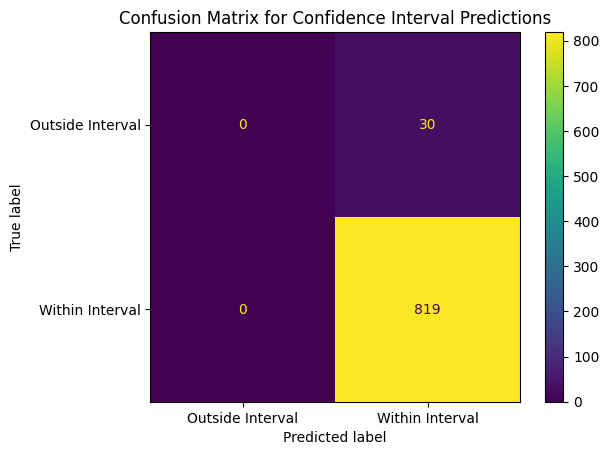

In [ ]:
import numpy as np
import scipy.stats as stats
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Calculate residuals
residuals = y_test - y_pred

# Estimate the standard error of the residuals
std_error = np.std(residuals)

# Define confidence level (e.g., 95%)
confidence_level = 0.95
z_score = stats.norm.ppf((1 + confidence_level) / 2)  # Z-score for 95% confidence

# Calculate confidence intervals for each prediction
lower_bound = y_pred - z_score * std_error
upper_bound = y_pred + z_score * std_error

# Check if the actual ROI falls within the confidence interval (True/False)
within_confidence_interval = (y_test >= lower_bound) & (y_test <= upper_bound)

# Convert True/False results to binary (True=1, False=0)
y_true = within_confidence_interval.astype(int)  # Actual values (within interval or not)
y_pred_binary = np.ones_like(y_true)  # Predicted values (assuming model predicts within interval)

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred_binary)

# Display the confusion matrix
print("Confusion Matrix:")
print(cm)

# Optionally, visualize the confusion matrix
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Outside Interval", "Within Interval"])
cmd.plot()
plt.title("Confusion Matrix for Confidence Interval Predictions")
plt.show()
